In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sys
# sys.path.append("..")
# from source.utils import transform_dict_col_to_col

In [43]:
# load data
df_portfolio = pd.read_json('../data/portfolio.json', lines=True)
df_profile = pd.read_json('../data/profile.json', lines=True)
df_transcript = pd.read_json('../data/transcript.json', lines=True)

### Portfolio Dataset

**Description**  
containing offer ids and meta data about each offer (duration, type, etc.)

**Schema**  
id (string) - offer id  
offer_type (string) - type of offer ie BOGO (buy one get one free), discount, informational  
difficulty (int) - minimum required spend to complete an offer  
reward (int) - reward given for completing an offer  
duration (int) - time for offer to be open, in days  
channels (list of strings)

In [44]:
df_portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


Let's rename the columns. When we merge datasets later, it's easier to differentiate the columns.

In [45]:
df_portfolio.rename(columns={'id': 'offer_id', 'duration': 'offer_duration', 'difficulty': 'offer_difficulty', 'channels': 'offer_channels', 'reward': 'offer_reward'}, inplace=True)
df_portfolio.head(3)

,offer_reward,offer_channels,offer_difficulty,offer_duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed


In [46]:
df_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   offer_reward      10 non-null     int64 
 1   offer_channels    10 non-null     object
 2   offer_difficulty  10 non-null     int64 
 3   offer_duration    10 non-null     int64 
 4   offer_type        10 non-null     object
 5   offer_id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [47]:
df_portfolio.describe()

,offer_reward,offer_difficulty,offer_duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [48]:
df_portfolio['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

#### Save cleaned portfolio data to pickle

In [49]:
df_portfolio.to_pickle('../data/portfolio_cleaned.pkl')

### Profile Dataset

**Description**  
demographic data for each customer

**Schema**   
age (int) - age of the customer  
became_member_on (int) - date when customer created an app account  
gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)  
id (str) - customer id  
income (float) - customer's income  

In [50]:
df_profile.head(3)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN


Let's rename the columns. When we merge datasets later, it's easier to differentiate the columns.

In [51]:
df_profile.rename(columns={'id': 'user_id'}, inplace=True)
df_profile.head(3)

,gender,age,user_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN


In [52]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   user_id           17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


Looking at the data types, we can see that became_member_on is type int, but it would be useful to have it as type datetime.  
Let's change that first.

In [53]:
# Transform became_member_on to dtype datetime
df_profile['became_member_on'] = pd.to_datetime(df_profile['became_member_on'], format='%Y%m%d')

Let's add a new column member_days that shows for how many days a member is registered.  
I will assume that the most recent day in the column is the day of the last registration.

In [54]:
# Add column member_days and drop became_member_on
df_profile['member_days'] = df_profile['became_member_on'].apply(lambda x: (df_profile['became_member_on'].max() - x).days)
df_profile.drop('became_member_on', axis=1, inplace=True)

Let's explore the cleaned dataset:

In [55]:
df_profile.describe()

,age,income,member_days
count,17000.000000,14825.000000,17000.000000
mean,62.531412,65404.991568,517.449882
std,26.738580,21598.299410,411.223904
min,18.000000,30000.000000,0.000000
25%,45.000000,49000.000000,208.000000
50%,58.000000,64000.000000,358.000000
75%,73.000000,80000.000000,791.000000
max,118.000000,120000.000000,1823.000000


<Axes: xlabel='gender'>

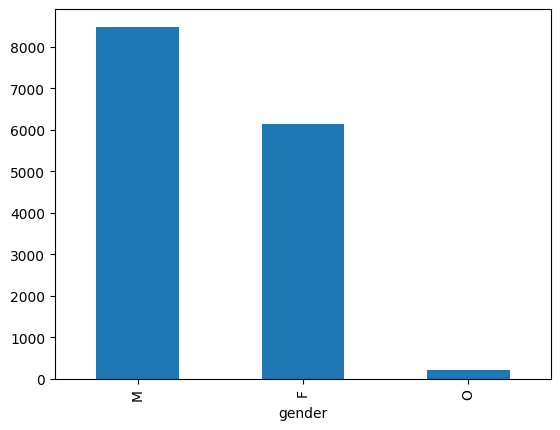

In [56]:
df_profile['gender'].value_counts().plot(kind='bar')

(array([1308., 1438., 2054., 3383., 3257., 2031.,  966.,  361.,   27.,
        2175.]),
 array([ 18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98., 108., 118.]),
 <BarContainer object of 10 artists>)

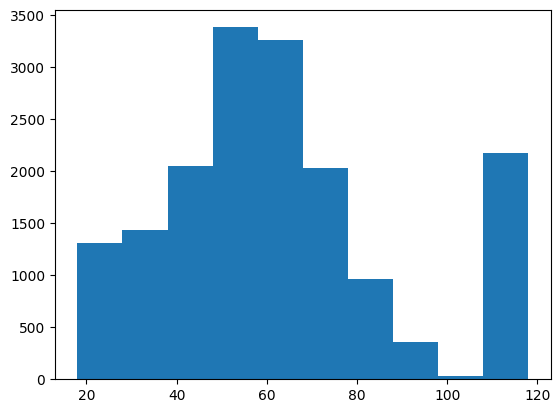

In [57]:
plt.hist(df_profile['age'])

#### Checking users with age over 100 years

Turns out that there are 5 people at age 101 years old which seems valid.  
But there are also 2175 persons with age 118 which doesn't seem correct. Nobody of these users declared their gender nor income. Thus, I don't see any value in keeping these and assume it's better to drop these instances from the dataset. 

In [58]:
# check values over 100 years. Doesn't seem right
df_profile_age100 = df_profile[df_profile['age'] == 101]
print(df_profile_age100.describe())
print('\nGender values:', df_profile_age100['gender'].value_counts())

         age        income  member_days
count    5.0      5.000000     5.000000
mean   101.0  67800.000000   491.200000
std      0.0  22398.660674   386.802534
min    101.0  43000.000000   241.000000
25%    101.0  56000.000000   259.000000
50%    101.0  59000.000000   295.000000
75%    101.0  82000.000000   504.000000
max    101.0  99000.000000  1157.000000

Gender values: gender
F    5
Name: count, dtype: int64


In [59]:
df_profile.drop(df_profile[df_profile['age'] == 118].index, inplace=True)

In [60]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       14825 non-null  object 
 1   age          14825 non-null  int64  
 2   user_id      14825 non-null  object 
 3   income       14825 non-null  float64
 4   member_days  14825 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


Now the data is cleaned, let's have a look at it!

<Axes: xlabel='income', ylabel='Count'>

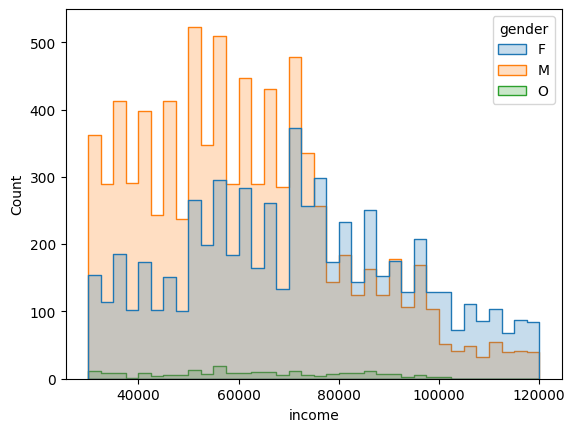

In [61]:
sns.histplot(data=df_profile, x='income', hue='gender', element="step")

<Axes: xlabel='age', ylabel='Count'>

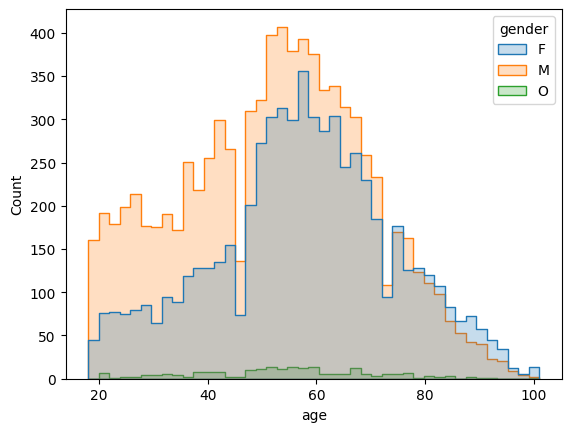

In [62]:
sns.histplot(data=df_profile, x='age', hue='gender', element="step")

<Axes: xlabel='member_days', ylabel='Count'>

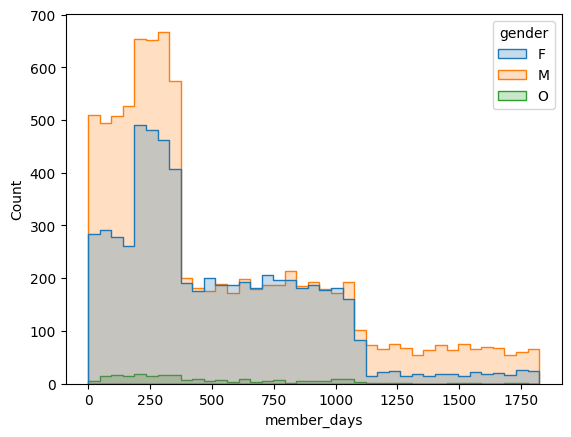

In [63]:
sns.histplot(data=df_profile, x='member_days', hue='gender', element="step")

#### Save cleaned profile data to pickle

In [64]:
df_profile.to_pickle('../data/profile_cleaned.pkl')

### Transcript Dataset

**Description**  
records for transactions, offers received, offers viewed, and offers completed

**Schema**  
event (str) - record description (ie transaction, offer received, offer viewed, etc.)  
person (str) - customer id  
time (int) - time in hours since start of test. The data begins at time t=0  
value - (dict of strings) - either an offer id or transaction amount depending on the record

In [65]:
df_transcript.head(3)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0


Looking at the dataframe, column 'value' looks strange. Cell values are in dictionary format.  
Let's extract these values by creating new columns for the dictionary keys with their respective values.

In [66]:
# extract dict values from value column
df_transcript = pd.concat([df_transcript, df_transcript['value'].apply(pd.Series)], axis=1)
df_transcript.head(3)

,person,event,value,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN


Seems like there are two offer id columns now. Let's fix that by adding them together. And we drop the value column since we extracted its values.

In [67]:
# Add together offer id and offer_id
df_transcript['offer_id'] = np.where(df_transcript['offer id'].isnull() & df_transcript['offer_id'].notnull(), df_transcript['offer_id'],df_transcript['offer id'])

# drop offer id and value columns
df_transcript.drop(['offer id', 'value'], axis=1, inplace=True)

Let's rename the columns. When we merge datasets later, it's easier to differentiate the columns.

In [68]:
df_transcript.rename(columns={'person': 'user_id', 'event': 'status', 'time': 'test_time', 'amount': 'amount_spent', 'reward': 'reward_received'}, inplace=True)
df_transcript.head(3)

,user_id,status,test_time,amount_spent,offer_id,reward_received
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN


As another step, let's transform the time column from hours to days as duration in the portfolio dataset is in days as well.

In [69]:
# transform time from hours to days
df_transcript['test_time'] = round(df_transcript['test_time'] / 24, 2)

Let's have a look at the resulting dataframe:

In [70]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          306534 non-null  object 
 1   status           306534 non-null  object 
 2   test_time        306534 non-null  float64
 3   amount_spent     138953 non-null  float64
 4   offer_id         167581 non-null  object 
 5   reward_received  33579 non-null   float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


In [71]:
df_transcript.describe()

,test_time,amount_spent,reward_received
count,306534.000000,138953.000000,33579.000000
mean,15.265956,12.777356,4.904137
std,8.346930,30.250529,2.886647
min,0.000000,0.050000,2.000000
25%,7.750000,2.780000,2.000000
50%,17.000000,8.890000,5.000000
75%,22.000000,18.070000,5.000000
max,29.750000,1062.280000,10.000000


(array([35540., 13961., 35789., 17345., 32589., 42039., 24307., 43552.,
        44593., 16819.]),
 array([ 0.   ,  2.975,  5.95 ,  8.925, 11.9  , 14.875, 17.85 , 20.825,
        23.8  , 26.775, 29.75 ]),
 <BarContainer object of 10 artists>)

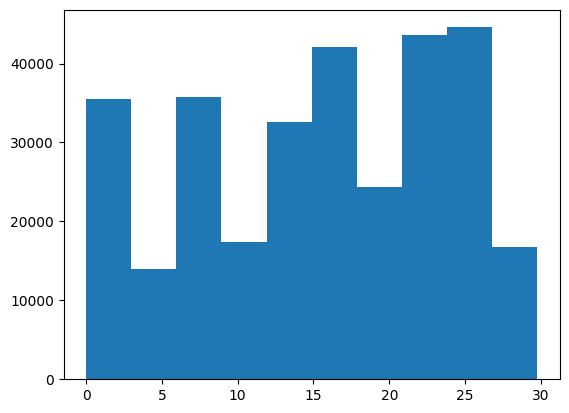

In [73]:
plt.hist(df_transcript['test_time'])

(array([52296., 21474., 19254., 17697., 13303.,  8066.,  3889.,  1576.,
          533.,   159.]),
 array([ 0.05 ,  5.039, 10.028, 15.017, 20.006, 24.995, 29.984, 34.973,
        39.962, 44.951, 49.94 ]),
 <BarContainer object of 10 artists>)

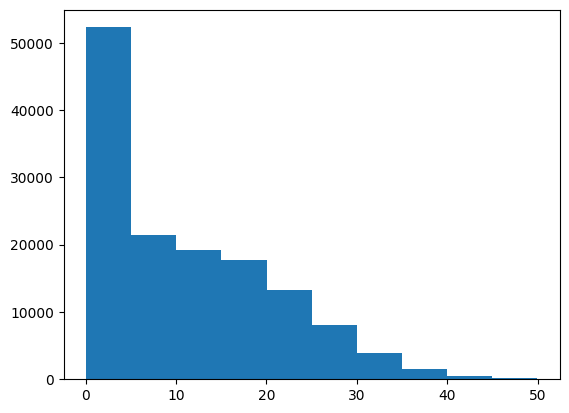

In [74]:
plt.hist(df_transcript[df_transcript['amount_spent'] < 50]['amount_spent'])

In [75]:
df_transcript['reward_received'].value_counts()

reward_received
5.0     12070
2.0      9334
10.0     7019
3.0      5156
Name: count, dtype: int64

#### Save cleaned transcript data to pickle

In [76]:
df_transcript.to_pickle('../data/transcript_cleaned.pkl')